# TODO

- Sepsat nejakou zpravu pro Kostase a Lukase.

- All unindentified are marked as unknown -> they should be removed in reorder_df. Use an optional argument for it.
- asi tam chtelo pri tomto erroru pridat link na https://github.com/Kaggle/kaggle-api
- napriklad tyto kravy jsou vygenerovany z par videi. takze bude strasne zalezet, jestli udelame nahodny split (ktery bude trivialni) nebo jestli udelame split podle videi (coz bude vyrazne tezsi)
- rozdeleni stahovaci skriptu podle kategorii.
- udelat porovnani s necim pro cloveka. napriklad https://github.com/KaiyangZhou/deep-person-reid
- chceme/muzeme nahrat na kaggle?
- udelat nejakou strukturu (class) -> pridat napriklad licence
- default structure of bounding box is (x_bot_left, y_bot_left, width, height)
- unify test/train/val
- co delat se zviraty, ktere maji pouze jeden vzorek?

# General info

- ID: OS agnostic unique identifier of re-id entity. MD5 hash of unique identifier.
    - MD5 hash of file name is used if it is unique. If not, folder structure is added.
    - ID is OS agnostic -> sort by id makes sense now.


In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from analysis import *

In [4]:
def analyze_dataset(dataset_name, **kwargs):
    root = os.path.join('datasets', dataset_name.__name__)
    if 'variant' in list(kwargs.keys()):
        dataset = dataset_name(root, variant=kwargs['variant'])
    else:
        dataset = dataset_name(root)
    display_statistics(dataset.df, root, **kwargs)
    return dataset.df

In [5]:
from matplotlib import pyplot as plt
from PIL import Image

def display_statistics(df, root, plot_images=True, display_dataframe=True, n=2, **kwargs):
    df_red = df.loc[df['identity'] != 'unknown', 'identity']
    df_red.value_counts().reset_index(drop=True).plot()
        
    if 'unknown' in list(df['identity'].unique()):
        n_identity = len(df.identity.unique()) - 1
    else:
        n_identity = len(df.identity.unique())
    print(f"Number of identitites          {n_identity}")
    print(f"Number of all samples          {len(df)}")
    print(f"Number of identified samples   {sum(df['identity'] != 'unknown')}")    
    print(f"Number of unidentified samples {sum(df['identity'] == 'unknown')}")
    if 'video' in df.columns:
        print(f"Number of videos               {len(df[['identity', 'video']].drop_duplicates())}")
    if plot_images:
        plot_bbox_segmentation(df, root, n)
    if display_dataframe:
        display(df)

def plot_image(img):
    fig, ax = plt.subplots()
    ax.imshow(img)
    plt.show()
    
def plot_segmentation(img, segmentation):
    if not np.isnan(segmentation).all():
        fig, ax = plt.subplots()
        ax.imshow(img)
        ax.plot(segmentation[0::2], segmentation[1::2], '--', linewidth=5, color='firebrick')
        plt.show()
    
def plot_bbox_segmentation(df, root, n):
    if 'bbox' not in df.columns and 'segmentation' not in df.columns:
        for i in range(n):
            img = Image.open(os.path.join(root, df['path'][i]))
            plot_image(img)
    if 'bbox' in df.columns:
        df_red = df[~df['bbox'].isnull()]
        for i in range(n):
            img = Image.open(os.path.join(root, df_red['path'].iloc[i]))
            segmentation = bbox_segmentation(df_red['bbox'].iloc[i])
            plot_segmentation(img, segmentation)
    if 'segmentation' in df.columns:
        df_red = df[~df['segmentation'].isnull()]
        for i in range(n):
            img = Image.open(os.path.join(root, df_red['path'].iloc[i]))
            segmentation = df_red['segmentation'].iloc[i]
            plot_segmentation(img, segmentation)
    if 'mask' in df.columns:
        df_red = df[~df['mask'].isnull()]
        for i in range(n):
            img = Image.open(os.path.join(root, df_red['mask'].iloc[i]))
            plot_image(img)            

# 1. AAUZebraFishID

- Images are from 2 videos from fish tank.
- In each of the video, there are 3 different zebrafish individuals (6 individuals in total). 
- Sampling frequency should be about 5 frames, otherwise the difference is way too small.
- There is bounding box. We changed it to our format.
- Additional features: Right,Turning,Occlusion,Glitch

Number of identitites          6
Number of all samples          6672
Number of identified samples   6672
Number of unidentified samples 0
Number of videos               6


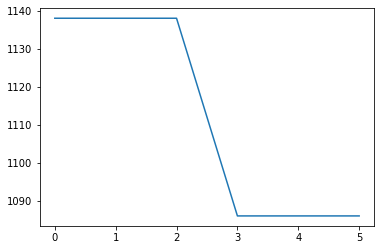

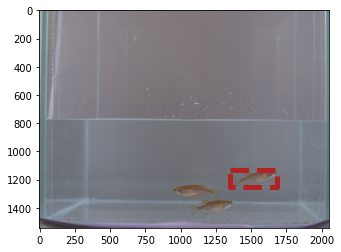

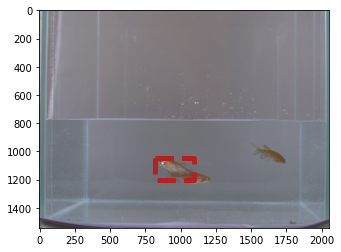

id                path  identity                    bbox  \
0     0000ef3f3f3ccd20  data/Vid2_0520.png         5  [1354, 1133, 330, 118]   
1     00024452851a343c  data/Vid2_0018.png         5   [820, 1048, 278, 154]   
2     0002c4ff6deeae40  data/Vid1_0062.png         3    [805, 1406, 274, 77]   
3     000444965a5463b1  data/Vid2_1065.png         4   [1689, 793, 297, 128]   
4     000e4b1f6c1b701a  data/Vid1_0851.png         3    [703, 1360, 244, 87]   
...                ...                 ...       ...                     ...   
6667  ffe429fefcf4aaec  data/Vid1_0594.png         3   [960, 1221, 157, 128]   
6668  ffecc47b83a1e1d3  data/Vid1_1072.png         3   [139, 1118, 232, 101]   
6669  ffef0c58981bdd51  data/Vid1_0601.png         1  [1224, 1260, 349, 154]   
6670  fff70b62d3ffb2d3  data/Vid2_0759.png         4    [599, 881, 335, 113]   
6671  fff73422a780afd4  data/Vid1_0576.png         2   [1433, 1430, 293, 89]   

      video                                         attributes  
0         1  {'Right': True, 'Turning': True, 'Occlusion': ...  
1         1  {'Right': True, 'Turning': True, 'Occlusion': ...  
2         0  {'Right': True, 'Turning': True, 'Occlusion': ...  
3         1  {'Right': True, 'Turning': True, 'Occlusion': ...  
4         0  {'Right': True, 'Turning': True, 'Occlusion': ...  
...     ...                                                ...  
6667      0  {'Right': True, 'Turning': True, 'Occlusion': ...  
6668      0  {'Right': True, 'Turning': True, 'Occlusion': ...  
6669      0  {'Right': True, 'Turning': True, 'Occlusion': ...  
6670      1  {'Right': True, 'Turning': True, 'Occlusion': ...  
6671      0  {'Right': True, 'Turning': True, 'Occlusion': ...  

[6672 rows x 6 columns]

In [6]:
analyze_dataset(AAUZebraFishID);

# 2. AerialCattle2017

- 23 Individual cows, Images are from recorded video footage
- Structure:
    - Individual folder -> Video volder -> Images

Number of identitites          23
Number of all samples          46340
Number of identified samples   46340
Number of unidentified samples 0
Number of videos               157


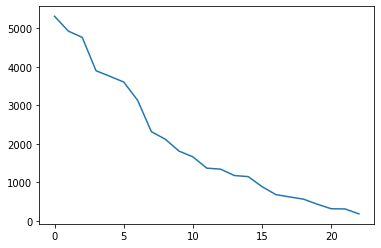

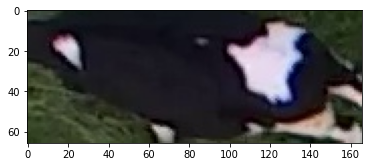

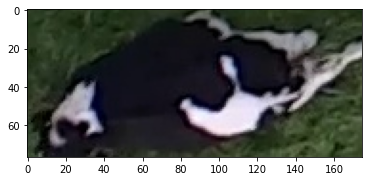

id                                        path  identity  \
0      0000e6ec141733f6   3owflku95bxsx24643cybxu3qh/21/4/17436.jpg        21   
1      000124f2ca1067b3   3owflku95bxsx24643cybxu3qh/20/7/35314.jpg        20   
2      0001da74f37e7021  3owflku95bxsx24643cybxu3qh/15/10/24360.jpg        15   
3      00022bf38f98f888  3owflku95bxsx24643cybxu3qh/20/10/33111.jpg        20   
4      0002a2e9b0493ac8   3owflku95bxsx24643cybxu3qh/20/4/36233.jpg        20   
...                 ...                                         ...       ...   
46335  fffc6a2f508c3096   3owflku95bxsx24643cybxu3qh/18/1/22708.jpg        18   
46336  fffc8d943f4a7232   3owflku95bxsx24643cybxu3qh/20/3/34155.jpg        20   
46337  fffd524866631e48   3owflku95bxsx24643cybxu3qh/20/9/33863.jpg        20   
46338  fffe7cd14caf86d1   3owflku95bxsx24643cybxu3qh/16/3/13736.jpg        16   
46339  ffffd42bc889002d     3owflku95bxsx24643cybxu3qh/8/3/1950.jpg         8   

      video  
0         4  
1         7  
2        10  
3        10  
4         4  
...     ...  
46335     1  
46336     3  
46337     9  
46338     3  
46339     3  

[46340 rows x 4 columns]

In [7]:
analyze_dataset(AerialCattle2017);

# 3. ATRW

- We ignored the detection and pose estimation data.
- We got ground truths from https://github.com/cvwc2019/ATRWEvalScript
- They claim 92 identities, in train set there is 107 identities in the training set and 75 in the testing set.
- They claim 3649 annotated images, train set contains only 1887 (3651 after adding the test set as well).
- TODO separate the two testing sets
- Bounding boxes were modified to standard format.

Number of identitites          182
Number of all samples          5415
Number of identified samples   5415
Number of unidentified samples 0


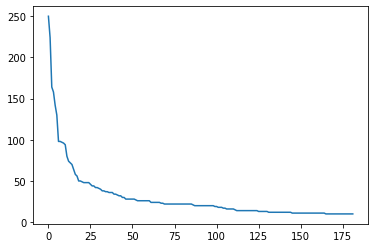

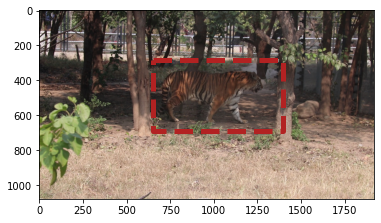

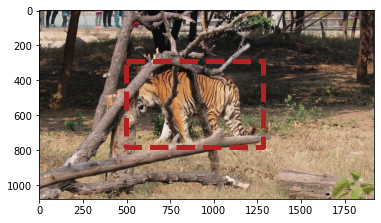

id                               path  identity  \
0     000408498f926bc6  atrw_detection_test/test/2639.jpg        16   
1     0004d0b59e19461f   atrw_reid_train/train/001970.jpg        34   
2     000871c1fc726f0b   atrw_reid_train/train/004612.jpg       177   
3     0031e80738c8832c  atrw_detection_test/test/1645.jpg        18   
4     00411460f7c92d21     atrw_reid_test/test/000363.jpg       112   
...                ...                                ...       ...   
5410  ffcf86475fe9dc67  atrw_detection_test/test/1108.jpg       180   
5411  ffd52f3c7e12435a   atrw_reid_train/train/000373.jpg       220   
5412  ffeabd223de0d4ea   atrw_reid_train/train/000575.jpg        60   
5413  ffedf5be3a86e2ee   atrw_reid_train/train/002302.jpg       267   
5414  ffeed84c7cb1ae7b     atrw_reid_test/test/001126.jpg       235   

                       bbox  \
0      [654, 285, 743, 406]   
1                       NaN   
2                       NaN   
3      [497, 292, 788, 493]   
4                       NaN   
...                     ...   
5410  [118, 189, 1484, 807]   
5411                    NaN   
5412                    NaN   
5413                    NaN   
5414                    NaN   

                                              keypoints  split  
0                                                   NaN   test  
1     [326, 77, 2, 283, 86, 2, 331, 141, 2, 210, 174...  train  
2     [127, 57, 2, 144, 82, 2, 93, 149, 2, 264, 183,...  train  
3                                                   NaN   test  
4     [0, 0, 0, 537, 28, 2, 562, 77, 2, 437, 135, 2,...   test  
...                                                 ...    ...  
5410                                                NaN   test  
5411  [208, 1, 2, 237, 6, 2, 0, 0, 0, 191, 104, 2, 1...  train  
5412  [55, 99, 2, 28, 80, 2, 2, 129, 2, 65, 184, 2, ...  train  
5413  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  train  
5414  [0, 0, 0, 843, 141, 2, 923, 275, 2, 599, 270, ...   test  

[5415 rows x 6 columns]

In [8]:
analyze_dataset(ATRW);

# 4. BelugaID

- Folders with Test and Valid are empty, without any data or annotations
- Annotations contains bounding box and segmentations in format [0, 0, XX, YY], indicating that the photos are already cropped.
- There are segmentations but all of them are boxes.

Number of identitites          788
Number of all samples          5902
Number of identified samples   5902
Number of unidentified samples 0


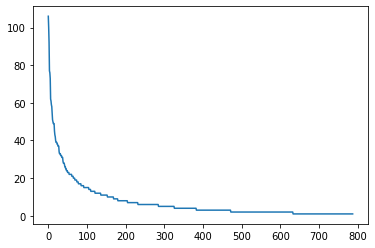

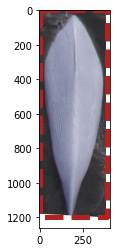

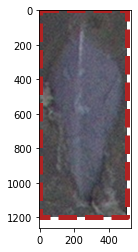

id                                           path  identity  \
0        0  beluga.coco/images/train2022/000000000001.jpg  whale000   
1        1  beluga.coco/images/train2022/000000000002.jpg  whale001   
2        2  beluga.coco/images/train2022/000000000003.jpg  whale002   
3        3  beluga.coco/images/train2022/000000000004.jpg  whale003   
4        4  beluga.coco/images/train2022/000000000005.jpg  whale004   
...    ...                                            ...       ...   
5897  5897  beluga.coco/images/train2022/000000005898.jpg  whale355   
5898  5898  beluga.coco/images/train2022/000000005899.jpg  whale206   
5899  5899  beluga.coco/images/train2022/000000005900.jpg  whale658   
5900  5900  beluga.coco/images/train2022/000000005901.jpg  whale568   
5901  5901  beluga.coco/images/train2022/000000005902.jpg  whale053   

                                        bbox  
0     [0.0, 0.0, 388.76889848812095, 1200.0]  
1                 [0.0, 0.0, 506.25, 1200.0]  
2                 [0.0, 0.0, 351.36, 1200.0]  
3     [0.0, 0.0, 422.58543833580984, 1200.0]  
4      [0.0, 0.0, 432.1041214750542, 1200.0]  
...                                      ...  
5897  [0.0, 0.0, 456.19834710743805, 1200.0]  
5898   [0.0, 0.0, 389.1156462585034, 1200.0]  
5899  [0.0, 0.0, 398.15668202764977, 1200.0]  
5900   [0.0, 0.0, 361.3747954173486, 1200.0]  
5901   [0.0, 0.0, 385.5203619909502, 1200.0]  

[5902 rows x 4 columns]

In [9]:
analyze_dataset(BelugaID);

# 5. Bird Individual ID

- 39 images are both in validation and training set
- There is additional structure in Cropped_pictures/sociable_weavers/Test_dataset. We ignored it.
- In zebra_finches/test there are wrong labels, where there are 1-3 birds in each photo.
- The splits may be wrong. For example Original_pictures/sociable_weavers does not contain test set.
- Consists of three species
    - Should we consider spliting dataset into 3 datasets for each species?

Number of identitites          50
Number of all samples          52434
Number of identified samples   51934
Number of unidentified samples 500


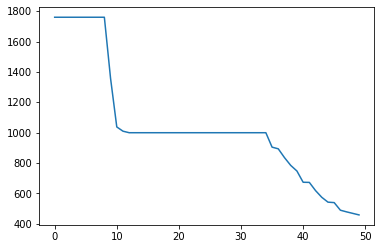

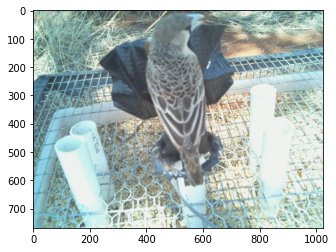

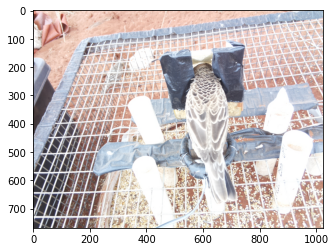

id                                               path  \
0      00001e87901dbf71  Original_pictures/IndividualID/sociable_weaver...   
1      0000a372903a53f8  Original_pictures/IndividualID/sociable_weaver...   
2      000156aa80be3202  Original_pictures/IndividualID/zebra_finches/T...   
3      0001b84cf55cb42a  Original_pictures/IndividualID/zebra_finches/T...   
4      0001e15353597c63  Original_pictures/IndividualID/zebra_finches/T...   
...                 ...                                                ...   
52429  fff92eb52a4b53d9  Original_pictures/IndividualID/zebra_finches/T...   
52430  fff999be7ccc1f80  Original_pictures/IndividualID/sociable_weaver...   
52431  fffb3f51087ca7e7  Original_pictures/IndividualID/zebra_finches/T...   
52432  fffc7e91911291a3  Original_pictures/IndividualID/zebra_finches/T...   
52433  fffd22886cfb5bf3  Original_pictures/IndividualID/great_tits/Trai...   

         identity           species  split  
0      011016B1FB  sociable_weavers  train  
1      011016AAEE  sociable_weavers  train  
2             103     zebra_finches  train  
3             130     zebra_finches  train  
4             198     zebra_finches  train  
...           ...               ...    ...  
52429         103     zebra_finches  train  
52430  0700EDB994  sociable_weavers  train  
52431         130     zebra_finches  train  
52432         098     zebra_finches  train  
52433  01101787FB        great_tits  train  

[52434 rows x 5 columns]

In [10]:
analyze_dataset(BirdIndividualID, variant='source');

Number of identitites          50
Number of all samples          52774
Number of identified samples   52274
Number of unidentified samples 500


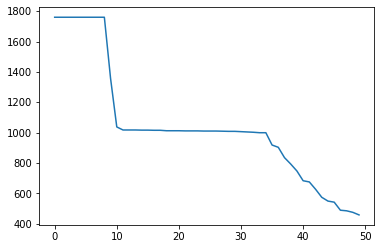

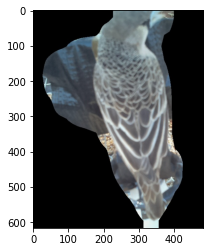

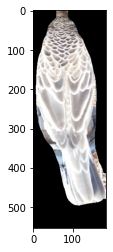

id                                               path  \
0      00001e87901dbf71  Cropped_pictures/IndividuaID/sociable_weavers/...   
1      0000a372903a53f8  Cropped_pictures/IndividuaID/sociable_weavers/...   
2      000156aa80be3202  Cropped_pictures/IndividuaID/zebra_finch/Train...   
3      0001b84cf55cb42a  Cropped_pictures/IndividuaID/zebra_finch/Train...   
4      0001e15353597c63  Cropped_pictures/IndividuaID/zebra_finch/Train...   
...                 ...                                                ...   
52769  fff92eb52a4b53d9  Cropped_pictures/IndividuaID/zebra_finch/Train...   
52770  fff999be7ccc1f80  Cropped_pictures/IndividuaID/sociable_weavers/...   
52771  fffb3f51087ca7e7  Cropped_pictures/IndividuaID/zebra_finch/Train...   
52772  fffc7e91911291a3  Cropped_pictures/IndividuaID/zebra_finch/Train...   
52773  fffd22886cfb5bf3  Cropped_pictures/IndividuaID/great_tits/Train/...   

         identity           species  split  
0      011016B1FB  sociable_weavers  train  
1      011016AAEE  sociable_weavers  train  
2             103       zebra_finch  train  
3             130       zebra_finch  train  
4             198       zebra_finch  train  
...           ...               ...    ...  
52769         103       zebra_finch  train  
52770  0700EDB994  sociable_weavers  train  
52771         130       zebra_finch  train  
52772         098       zebra_finch  train  
52773  01101787FB        great_tits  train  

[52774 rows x 5 columns]

In [11]:
analyze_dataset(BirdIndividualID, variant='segmented');

# 6. BristolGorillas2020

# 7. C-Tai

- C-Zoo and C-Tai have the same structure.
- Keypoints describe RightEye, LeftEye, MouthCenter, LeftEarlobe, RightEarlobe in x-y position. Inf if not present.
- Even though training and testing splits were provided (5 times), we decided to ignore them because they do not cover the whole dataset.
- I think that the identity 'Adult' is not recognized. I changed it to unkwown.

Number of identitites          77
Number of all samples          5078
Number of identified samples   4662
Number of unidentified samples 416


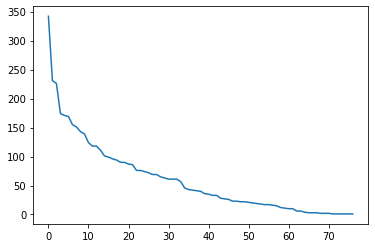

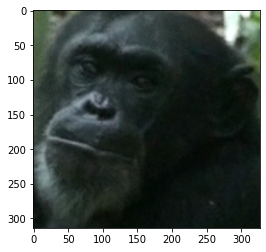

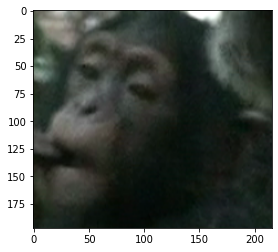

id                                               path identity  \
0        0  chimpanzee_faces-master/datasets_cropped_chimp...    Fredy   
1        1  chimpanzee_faces-master/datasets_cropped_chimp...   Victor   
2        2  chimpanzee_faces-master/datasets_cropped_chimp...    Fredy   
3        3  chimpanzee_faces-master/datasets_cropped_chimp...   Victor   
4        4  chimpanzee_faces-master/datasets_cropped_chimp...    Fredy   
...    ...                                                ...      ...   
5073  5073  chimpanzee_faces-master/datasets_cropped_chimp...    Besar   
5074  5074  chimpanzee_faces-master/datasets_cropped_chimp...   Mkubwa   
5075  5075  chimpanzee_faces-master/datasets_cropped_chimp...     Atra   
5076  5076  chimpanzee_faces-master/datasets_cropped_chimp...     Kuba   
5077  5077  chimpanzee_faces-master/datasets_cropped_chimp...  Kabisha   

                                              keypoints  \
0     [81.0, 82.0, 159.0, 102.0, 70.0, 193.0, 244.0,...   
1     [48.0, 55.0, 99.0, 73.0, 20.0, 125.0, 152.0, 1...   
2     [55.0, 88.0, 127.0, 89.0, 45.0, 184.0, 248.0, ...   
3     [47.0, 44.0, 94.0, 60.0, 14.0, 112.0, nan, nan...   
4     [68.0, 74.0, 145.0, 64.0, 86.0, 171.0, 266.0, ...   
...                                                 ...   
5073  [nan, nan, 32.0, 16.0, 7.0, 35.0, 57.0, 41.0, ...   
5074  [17.0, 27.0, 41.0, 24.0, 10.0, 79.0, 98.0, 38....   
5075  [26.0, 53.0, 53.0, 52.0, 39.0, 96.0, 99.0, 34....   
5076  [26.0, 19.0, 38.0, 19.0, 32.0, 42.0, nan, nan,...   
5077  [33.0, 19.0, 53.0, 13.0, 63.0, 41.0, nan, nan,...   

                                             attributes  
0     {'age': 32.0, 'age_group': 'Adult', 'gender': ...  
1     {'age': 3.0, 'age_group': 'Infant', 'gender': ...  
2     {'age': 32.0, 'age_group': 'Adult', 'gender': ...  
3     {'age': 3.0, 'age_group': 'Infant', 'gender': ...  
4     {'age': 32.0, 'age_group': 'Adult', 'gender': ...  
...                                                 ...  
5073  {'age': 9.0, 'age_group': 'Juvenile', 'gender'...  
5074  {'age': 39.0, 'age_group': 'Adult', 'gender': ...  
5075  {'age': 17.0, 'age_group': 'Adult', 'gender': ...  
5076  {'age': 2.0, 'age_group': 'Infant', 'gender': ...  
5077  {'age': 21.0, 'age_group': 'Adult', 'gender': ...  

[5078 rows x 5 columns]

In [12]:
analyze_dataset(CTai);

# 8. C-Zoo

- C-Zoo and C-Tai have the same structure.
- Keypoints describe RightEye, LeftEye, MouthCenter, LeftEarlobe, RightEarlobe in x-y position. Inf as not present was replaced by np.nan.
- Even though training and testing splits were provided (5 times), we decided to ignore them because they do not cover the whole dataset. Actually this is a problem only for CTai and not for CZoo but I guess that it should be unified.


Number of identitites          24
Number of all samples          2109
Number of identified samples   2109
Number of unidentified samples 0


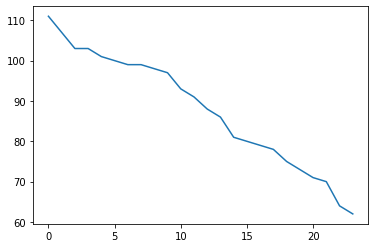

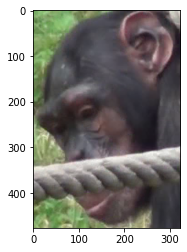

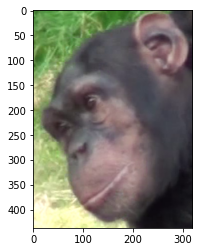

id                                               path  identity  \
0        0  chimpanzee_faces-master/datasets_cropped_chimp...      Alex   
1        1  chimpanzee_faces-master/datasets_cropped_chimp...      Alex   
2        2  chimpanzee_faces-master/datasets_cropped_chimp...      Alex   
3        3  chimpanzee_faces-master/datasets_cropped_chimp...    Jahaga   
4        4  chimpanzee_faces-master/datasets_cropped_chimp...    Jahaga   
...    ...                                                ...       ...   
2104  2104  chimpanzee_faces-master/datasets_cropped_chimp...      Kara   
2105  2105  chimpanzee_faces-master/datasets_cropped_chimp...      Kofi   
2106  2106  chimpanzee_faces-master/datasets_cropped_chimp...  Natascha   
2107  2107  chimpanzee_faces-master/datasets_cropped_chimp...      Kofi   
2108  2108  chimpanzee_faces-master/datasets_cropped_chimp...      Ulla   

                                              keypoints  \
0     [56.0, 260.0, 118.0, 225.0, 125.0, 434.0, 270....   
1     [53.0, 233.0, 115.0, 184.0, 109.0, 378.0, 280....   
2     [82.0, 198.0, 166.0, 156.0, 154.0, 341.0, 318....   
3     [159.0, 142.0, 253.0, 149.0, 199.0, 337.0, nan...   
4     [166.0, 190.0, 259.0, 199.0, 186.0, 364.0, nan...   
...                                                 ...   
2104  [62.0, 61.0, 95.0, 60.0, 78.0, 108.0, nan, nan...   
2105  [nan, nan, 292.0, 101.0, 113.0, 31.0, 255.0, 3...   
2106  [562.0, 576.0, nan, nan, 342.0, 913.0, nan, na...   
2107  [nan, nan, 293.0, 92.0, 131.0, 24.0, 271.0, 29...   
2108  [408.0, 221.0, 377.0, 391.0, 203.0, 273.0, nan...   

                                             attributes  
0     {'age': 9, 'age_group': 'Juvenile', 'gender': ...  
1     {'age': 9, 'age_group': 'Juvenile', 'gender': ...  
2     {'age': 9, 'age_group': 'Juvenile', 'gender': ...  
3     {'age': 17, 'age_group': 'Adult', 'gender': 'F...  
4     {'age': 17, 'age_group': 'Adult', 'gender': 'F...  
...                                                 ...  
2104  {'age': 5, 'age_group': 'Infant', 'gender': 'F...  
2105  {'age': 5, 'age_group': 'Infant', 'gender': 'M...  
2106  {'age': 30, 'age_group': 'Adult', 'gender': 'F...  
2107  {'age': 5, 'age_group': 'Infant', 'gender': 'M...  
2108  {'age': 33, 'age_group': 'Adult', 'gender': 'F...  

[2109 rows x 5 columns]

In [13]:
analyze_dataset(CZoo);

# 9. Cows 2021

- The train set was probably designed for clustering. It does not contain labels.
- After a discussion with the author, we selected only the test set, which has labels. This is the reason why we report less images than the original paper.

Number of identitites          181
Number of all samples          8670
Number of identified samples   8670
Number of unidentified samples 0


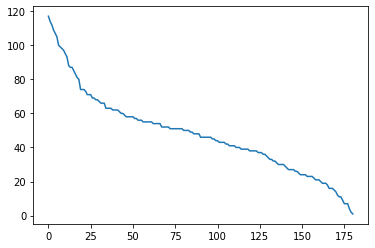

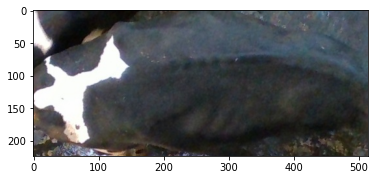

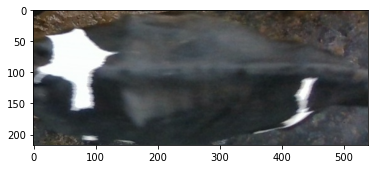

id                                               path  \
0     0002727eeb73821e  4vnrca7qw1642qlwxjadp87h7/Sub-levels/Identific...   
1     0006bdedf01b398c  4vnrca7qw1642qlwxjadp87h7/Sub-levels/Identific...   
2     0008348119f439bf  4vnrca7qw1642qlwxjadp87h7/Sub-levels/Identific...   
3     000a638c38d40de4  4vnrca7qw1642qlwxjadp87h7/Sub-levels/Identific...   
4     000ef4fe8e5eb2d4  4vnrca7qw1642qlwxjadp87h7/Sub-levels/Identific...   
...                ...                                                ...   
8665  ffd2ac884021cdac  4vnrca7qw1642qlwxjadp87h7/Sub-levels/Identific...   
8666  ffe1d2a86eb7e045  4vnrca7qw1642qlwxjadp87h7/Sub-levels/Identific...   
8667  fff58d699e4afd19  4vnrca7qw1642qlwxjadp87h7/Sub-levels/Identific...   
8668  fffe67cc790052ff  4vnrca7qw1642qlwxjadp87h7/Sub-levels/Identific...   
8669  ffffbb72abda45bc  4vnrca7qw1642qlwxjadp87h7/Sub-levels/Identific...   

      identity  
0           19  
1           90  
2          137  
3          116  
4           76  
...        ...  
8665       124  
8666       166  
8667        45  
8668        16  
8669         4  

[8670 rows x 3 columns]

In [14]:
analyze_dataset(Cows2021);

# 10. Drosophila

- D. melanogaster were housed at 25 ̊C on a 12-12 Light-Dark cycle. 10 males and 10 females were collected 1-4 hours after eclosion and housed separately. On the third day, post-eclosion flies were individually mouth pipetted into a circular acrylic arena (60mm diameter, 2mm high). These flies were illuminated with standard overhead LED bulbs and filmed in grayscale with a GRAS-20S4M for 15 minutes, with 16 frames/second. This was repeated for three consecutive days in total, which resulted in 14,400 × 3 images per fly. Each filming session was within 2 hours of ZT 8. Three independent datasets were acquired of 20 flies each.
- Even they talk about 3 datasets of 20 flies each, I combined them into 1 dataset of 60 flies.

Number of identitites          60
Number of all samples          2591820
Number of identified samples   2591700
Number of unidentified samples 120


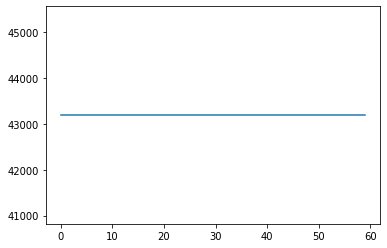

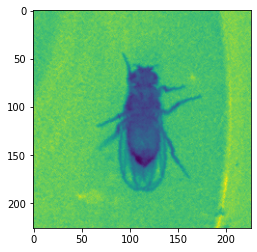

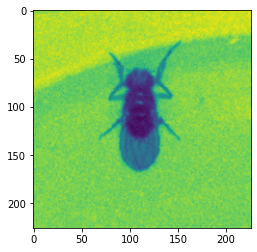

id                                           path  \
0        0000037acf3f5039  week1_Day2_train_16to20/17/dir[1]_17_7540.png   
1        000004c0580527ad   week1_Day2_train_06to10/07/dir[1]_7_4043.png   
2        00000507fabd9735   week1_Day1_train_01to05/02/dir[1]_2_4615.png   
3        00000f9e8b66b5db               week3_Day3_13to16/14/14_4141.png   
4        00001238a4ac6d33               week3_Day3_13to16/13/13_3353.png   
...                   ...                                            ...   
2591815  ffffec13ca4cf2f7  week1_Day1_train_11to15/12/dir[1]_12_8897.png   
2591816  fffff12a5932fa40                week3_Day3_05to08/06/6_1855.png   
2591817  fffff385f6d31686  week1_Day1_train_16to20/20/dir[1]_20_4879.png   
2591818  fffff86f4afdd17e      week3_Day2_val/val/17/dir[1]_17_14118.png   
2591819  fffffd8bb87d0abb  week1_Day2_train_11to15/12/dir[1]_12_4773.png   

        identity  split  
0             17  train  
1              7  train  
2              2  train  
3             54  train  
4             53  train  
...          ...    ...  
2591815       12  train  
2591816       46  train  
2591817       20  train  
2591818       57    val  
2591819       12  train  

[2591820 rows x 4 columns]

In [15]:
analyze_dataset(Drosophila);

# 11. FriesianCattle2015

- There is a split for open-set problem. 10 cows in the training set and 40 cows in the testing set.

Number of identitites          40
Number of all samples          377
Number of identified samples   377
Number of unidentified samples 0


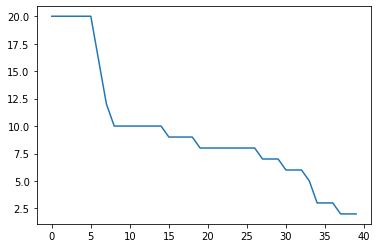

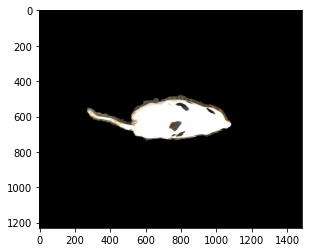

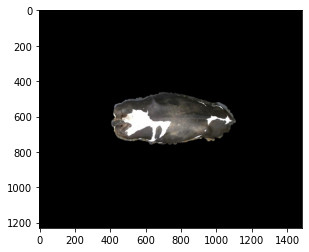

id                                               path  \
0    000912763e305fbf  wurzq71kfm561ljahbwjhx9n3/Cows-testing/Cow16/c...   
1    00fa32a2e11048da  wurzq71kfm561ljahbwjhx9n3/Cows-testing/Cow9/co...   
2    01af8958e647d68a  wurzq71kfm561ljahbwjhx9n3/Cows-testing/Cow26/c...   
3    01d8f02c86b3c48a  wurzq71kfm561ljahbwjhx9n3/Cows-testing/Cow3/co...   
4    020b33e51a98bb9b  wurzq71kfm561ljahbwjhx9n3/Cows-training/Cow2/c...   
..                ...                                                ...   
372  fb9e98ad30838a55  wurzq71kfm561ljahbwjhx9n3/Cows-testing/Cow36/c...   
373  fcd222780031a65b  wurzq71kfm561ljahbwjhx9n3/Cows-training/Cow10/...   
374  fd18683decc3a16a  wurzq71kfm561ljahbwjhx9n3/Cows-testing/Cow19/c...   
375  ffad079e26205e82  wurzq71kfm561ljahbwjhx9n3/Cows-testing/Cow3/co...   
376  ffc847c1c3577716  wurzq71kfm561ljahbwjhx9n3/Cows-training/Cow1/c...   

     identity  split  
0          16   test  
1           9   test  
2          26   test  
3           3   test  
4           2  train  
..        ...    ...  
372        36   test  
373        10  train  
374        19   test  
375         3   test  
376         1  train  

[377 rows x 4 columns]

In [16]:
analyze_dataset(FriesianCattle2015);

# 12. FriesianCattle2017

- Unlike the 2015 dataset, there is no training-testing split provided.

Number of identitites          89
Number of all samples          940
Number of identified samples   940
Number of unidentified samples 0


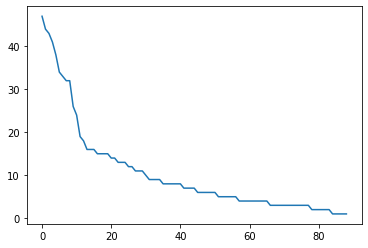

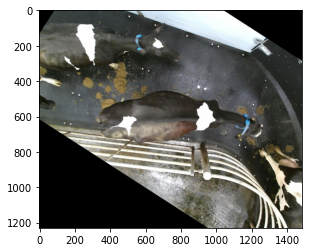

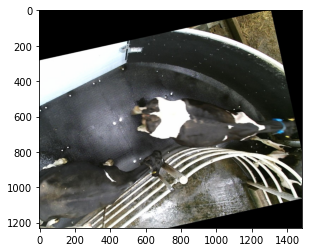

id                                   path  identity
0    00b9268464cdc1ce  2yizcfbkuv4352pzc32n54371r/54/617.jpg        54
1    00e37d1890461de4  2yizcfbkuv4352pzc32n54371r/30/362.jpg        30
2    00f3e3314ae3096e  2yizcfbkuv4352pzc32n54371r/59/667.jpg        59
3    015315fd3f8e0195  2yizcfbkuv4352pzc32n54371r/19/297.jpg        19
4    0284943241a395b9  2yizcfbkuv4352pzc32n54371r/64/726.jpg        64
..                ...                                    ...       ...
935  fdedde94b72e56d1   2yizcfbkuv4352pzc32n54371r/9/102.jpg         9
936  fe1b7567b3efee86  2yizcfbkuv4352pzc32n54371r/59/683.jpg        59
937  fe5df232cafa4c4e     2yizcfbkuv4352pzc32n54371r/1/7.jpg         1
938  fed1da6da79ca8f0    2yizcfbkuv4352pzc32n54371r/5/34.jpg         5
939  fefd33757593e984  2yizcfbkuv4352pzc32n54371r/20/301.jpg        20

[940 rows x 3 columns]

In [17]:
analyze_dataset(FriesianCattle2017);

# 13. GiraffeZebraID
- WildMe dataset
- There are 11 mistakes in labels, where there are two animals at on photo.
- The only WildMe dataset with 'valid' segmentations (different from bounding boxes).

Number of identitites          2056
Number of all samples          6925
Number of identified samples   6925
Number of unidentified samples 0


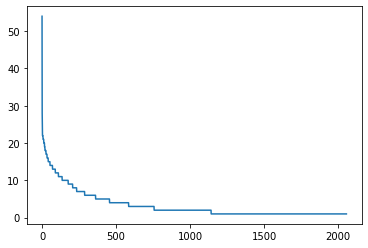

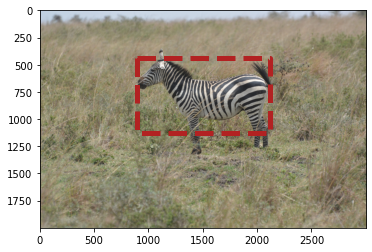

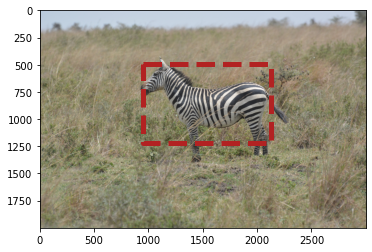

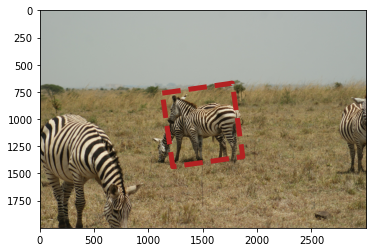

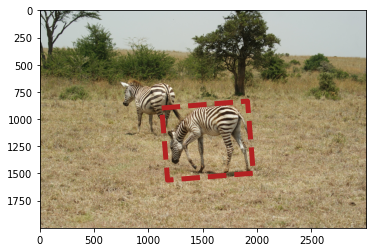

id                                         path       identity  \
0        0  gzgc.coco/images/train2020/000000000001.jpg  IBEIS_PZ_1561   
1        1  gzgc.coco/images/train2020/000000000002.jpg  IBEIS_PZ_1561   
2        2  gzgc.coco/images/train2020/000000000003.jpg  IBEIS_PZ_1561   
3        3  gzgc.coco/images/train2020/000000000004.jpg  IBEIS_PZ_1563   
4        4  gzgc.coco/images/train2020/000000000005.jpg  NNP_GIRM_0140   
...    ...                                          ...            ...   
6920  6920  gzgc.coco/images/train2020/000000004944.jpg  NNP_GIRM_0074   
6921  6921  gzgc.coco/images/train2020/000000004945.jpg  NNP_GIRM_0030   
6922  6922  gzgc.coco/images/train2020/000000004946.jpg  NNP_GIRM_0030   
6923  6923  gzgc.coco/images/train2020/000000004947.jpg  NNP_GIRM_0069   
6924  6924  gzgc.coco/images/train2020/000000004948.jpg  NNP_GIRM_0069   

                                                   bbox segmentation  \
0                         [895.5, 437.0, 1221.0, 690.0]          NaN   
1                         [951.0, 488.5, 1178.5, 728.5]          NaN   
2                         [981.0, 552.5, 1131.0, 750.0]          NaN   
3                         [432.5, 531.0, 1740.0, 938.5]          NaN   
4                         [1568.5, 942.5, 450.0, 462.5]          NaN   
...                                                 ...          ...   
6920  [1084.2696629213483, 0.0, 1152.3876404494383, ...          NaN   
6921  [779.494382022472, 363.76404494382024, 681.179...          NaN   
6922  [1358.1460674157304, 0.0, 912.2191011235956, 1...          NaN   
6923  [1221.2078651685395, 231.03932584269666, 458.5...          NaN   
6924  [1127.1067415730338, 37.921348314606746, 689.6...          NaN   

            species  
0      zebra_plains  
1      zebra_plains  
2      zebra_plains  
3      zebra_plains  
4     giraffe_masai  
...             ...  
6920  giraffe_masai  
6921  giraffe_masai  
6922  giraffe_masai  
6923  giraffe_masai  
6924  giraffe_masai  

[6925 rows x 6 columns]

In [18]:
df = analyze_dataset(GiraffeZebraID);

In [19]:
df[df[['identity', 'path']].duplicated(keep=False)]

id                                         path       identity  \
2670  2670  gzgc.coco/images/train2020/000000001863.jpg  NNP_GIRM_0060   
2671  2671  gzgc.coco/images/train2020/000000001863.jpg  NNP_GIRM_0060   
2872  2872  gzgc.coco/images/train2020/000000002012.jpg  IBEIS_PZ_0777   
2874  2874  gzgc.coco/images/train2020/000000002012.jpg  IBEIS_PZ_0784   
2875  2875  gzgc.coco/images/train2020/000000002012.jpg  IBEIS_PZ_0777   
2876  2876  gzgc.coco/images/train2020/000000002012.jpg  IBEIS_PZ_0784   
4792  4792  gzgc.coco/images/train2020/000000003499.jpg  IBEIS_PZ_0002   
4795  4795  gzgc.coco/images/train2020/000000003499.jpg  IBEIS_PZ_0002   
5015  5015  gzgc.coco/images/train2020/000000003628.jpg  IBEIS_PZ_0453   
5016  5016  gzgc.coco/images/train2020/000000003628.jpg  IBEIS_PZ_0453   
5017  5017  gzgc.coco/images/train2020/000000003629.jpg  IBEIS_PZ_0453   
5018  5018  gzgc.coco/images/train2020/000000003629.jpg  IBEIS_PZ_0453   
5089  5089  gzgc.coco/images/train2020/000000003675.jpg  IBEIS_PZ_0049   
5090  5090  gzgc.coco/images/train2020/000000003675.jpg  IBEIS_PZ_0049   
5093  5093  gzgc.coco/images/train2020/000000003676.jpg  IBEIS_PZ_0049   
5094  5094  gzgc.coco/images/train2020/000000003676.jpg  IBEIS_PZ_0049   
5553  5553  gzgc.coco/images/train2020/000000003948.jpg  IBEIS_PZ_0192   
5554  5554  gzgc.coco/images/train2020/000000003948.jpg  IBEIS_PZ_0192   
6851  6851  gzgc.coco/images/train2020/000000004901.jpg  NNP_GIRM_0043   
6852  6852  gzgc.coco/images/train2020/000000004901.jpg  NNP_GIRM_0043   
6866  6866  gzgc.coco/images/train2020/000000004906.jpg  NNP_GIRM_0053   
6867  6867  gzgc.coco/images/train2020/000000004906.jpg  NNP_GIRM_0053   

                                                   bbox segmentation  \
2670                   [573.75, 261.0, 2365.5, 1988.25]          NaN   
2671                     [1410.0, 261.0, 616.5, 1105.5]          NaN   
2872                      [848.5, 291.0, 1268.5, 960.0]          NaN   
2874                      [1272.5, 111.0, 411.0, 252.5]          NaN   
2875                      [870.0, 321.0, 1221.0, 985.5]          NaN   
2876                       [1230.0, 81.0, 415.5, 351.0]          NaN   
4792  [382.17703349282294, 812.7990430622009, 461.12...          NaN   
4795  [865.7296650717703, 803.8277511961722, 630.681...          NaN   
5015       [1040.0390625, 843.75, 726.5625, 392.578125]          NaN   
5016       [11.71875, 773.4375, 615.234375, 427.734375]          NaN   
5017  [1458.984375, 650.390625, 629.8828125, 500.976...          NaN   
5018      [963.8671875, 638.671875, 574.21875, 421.875]          NaN   
5089  [2185.406698564593, 434.2105263157895, 366.028...          NaN   
5090  [984.1507177033492, 534.688995215311, 571.4712...          NaN   
5093  [1287.3803827751196, 898.9234449760766, 654.00...          NaN   
5094  [604.6650717703349, 864.8325358851674, 525.717...          NaN   
5553  [1976.6566265060242, 805.3463855421687, 736.44...          NaN   
5554  [839.796686746988, 739.8343373493976, 612.7635...          NaN   
6851  [1362.359550561798, 445.22471910112364, 1092.6...          NaN   
6852  [921.3483146067416, 608.1460674157304, 1255.61...          NaN   
6866  [942.4157303370787, 428.37078651685397, 1023.8...          NaN   
6867  [1388.3426966292136, 745.0842696629214, 1054.0...          NaN   

            species  
2670  giraffe_masai  
2671  giraffe_masai  
2872   zebra_plains  
2874   zebra_plains  
2875   zebra_plains  
2876   zebra_plains  
4792   zebra_plains  
4795   zebra_plains  
5015   zebra_plains  
5016   zebra_plains  
5017   zebra_plains  
5018   zebra_plains  
5089   zebra_plains  
5090   zebra_plains  
5093   zebra_plains  
5094   zebra_plains  
5553   zebra_plains  
5554   zebra_plains  
6851  giraffe_masai  
6852  giraffe_masai  
6866  giraffe_masai  
6867  giraffe_masai

# 14. Giraffes

- Dataset is poorly documented
- 'Clusters' are probably identities. 'Annotation' consists of bboxes.
- I think this is not correct. The paper mentions different values.

Number of identitites          178
Number of all samples          1393
Number of identified samples   1393
Number of unidentified samples 0


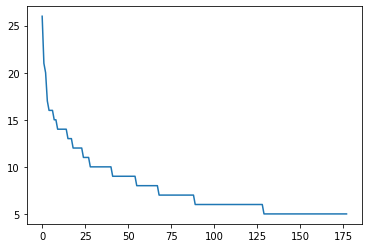

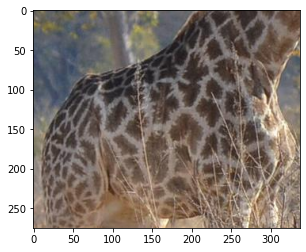

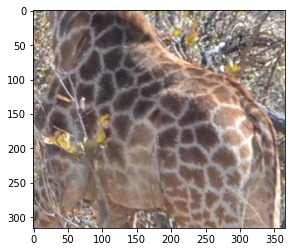

id                                               path  \
0     007814b19d61746a  pbil.univ-lyon1.fr/pub/datasets/miele2021/clus...   
1     009302cbbd62935c  pbil.univ-lyon1.fr/pub/datasets/miele2021/clus...   
2     00f03bf50f67578e  pbil.univ-lyon1.fr/pub/datasets/miele2021/clus...   
3     014ca92c414554c8  pbil.univ-lyon1.fr/pub/datasets/miele2021/clus...   
4     01528dcb1ae17c2b  pbil.univ-lyon1.fr/pub/datasets/miele2021/clus...   
...                ...                                                ...   
1388  ff440ae175ef57a2  pbil.univ-lyon1.fr/pub/datasets/miele2021/clus...   
1389  ff55821467049842  pbil.univ-lyon1.fr/pub/datasets/miele2021/clus...   
1390  ff6dcd5fcb664a1e  pbil.univ-lyon1.fr/pub/datasets/miele2021/clus...   
1391  ffc69548a5a08034  pbil.univ-lyon1.fr/pub/datasets/miele2021/clus...   
1392  ffeaf28aca6a873f  pbil.univ-lyon1.fr/pub/datasets/miele2021/clus...   

         identity  
0      cluster225  
1     cluster1266  
2     cluster9.03  
3      cluster539  
4      cluster875  
...           ...  
1388   cluster249  
1389   cluster466  
1390  cluster1176  
1391  cluster1302  
1392   cluster791  

[1393 rows x 3 columns]

In [20]:
analyze_dataset(Giraffes);

# 15. HappyWhale

- There are lot of identities that have very small number of observation (1 observation)
- What should we do with the provided testing set without labels?

Number of identitites          15587
Number of all samples          78989
Number of identified samples   51033
Number of unidentified samples 27956


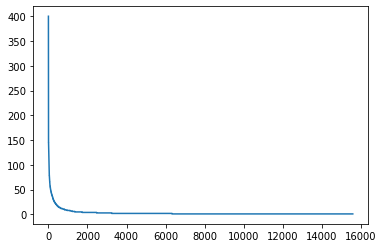

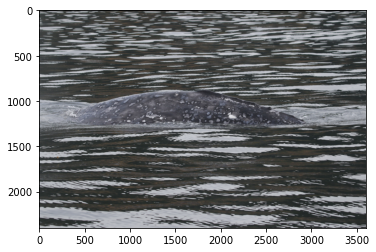

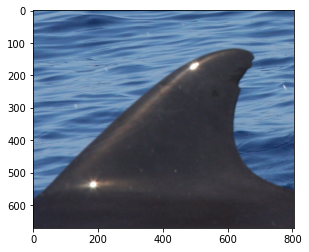

id                             path      identity  \
0      000110707af0ba   test_images/000110707af0ba.jpg       unknown   
1      00021adfb725ed  train_images/00021adfb725ed.jpg  cadddb1636b9   
2      000562241d384d  train_images/000562241d384d.jpg  1a71fbb72250   
3      0006287ec424cb   test_images/0006287ec424cb.jpg       unknown   
4      0007c33415ce37  train_images/0007c33415ce37.jpg  60008f293a2b   
...               ...                              ...           ...   
78984  fff96371332c16   test_images/fff96371332c16.jpg       unknown   
78985  fffbc5dd642d8c  train_images/fffbc5dd642d8c.jpg  4000b3d7c24e   
78986  fffc1c4d3eabc7   test_images/fffc1c4d3eabc7.jpg       unknown   
78987  fffc50be10c175   test_images/fffc50be10c175.jpg       unknown   
78988  fffdcd42312777  train_images/fffdcd42312777.jpg  4ddb2eeb5efb   

                  species  split  
0                 unknown   test  
1      melon_headed_whale  train  
2          humpback_whale  train  
3                 unknown   test  
4      false_killer_whale  train  
...                   ...    ...  
78984             unknown   test  
78985              beluga  train  
78986             unknown   test  
78987             unknown   test  
78988  bottlenose_dolphin  train  

[78989 rows x 5 columns]

In [21]:
analyze_dataset(HappyWhale);

# 16. HumpbackWhaleID

- Some datapoints don't have label (identity 'new_whale')
- What should we do with the provided testing set without labels?

Number of identitites          5004
Number of all samples          33321
Number of identified samples   15697
Number of unidentified samples 17624


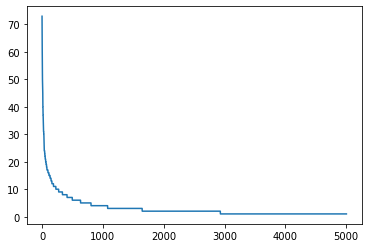

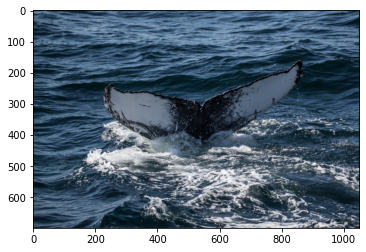

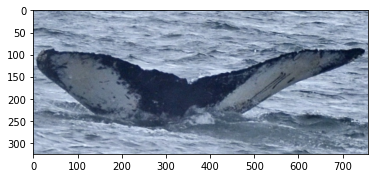

id                 path   identity  split
0      0000e88ab  train/0000e88ab.jpg  w_f48451c  train
1      0001f9222  train/0001f9222.jpg  w_c3d896a  train
2      00028a005   test/00028a005.jpg    unknown   test
3      00029d126  train/00029d126.jpg  w_20df2c5  train
4      00050a15a  train/00050a15a.jpg    unknown  train
...          ...                  ...        ...    ...
33316  fff9002e0  train/fff9002e0.jpg  w_bd1c3d5  train
33317  fffcde6fe  train/fffcde6fe.jpg  w_9f30885  train
33318  fffde072b  train/fffde072b.jpg    unknown  train
33319  fffed0665   test/fffed0665.jpg    unknown   test
33320  ffffc6980   test/ffffc6980.jpg    unknown   test

[33321 rows x 4 columns]

In [22]:
analyze_dataset(HumpbackWhaleID);

# 17. HyenaID2022

- There is 1 mistake in labels, where there are two animals at on photo.

Number of identitites          256
Number of all samples          3129
Number of identified samples   3129
Number of unidentified samples 0


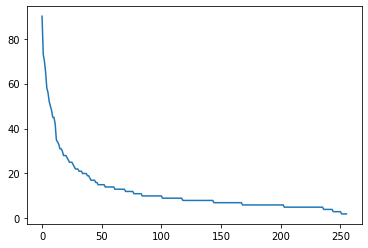

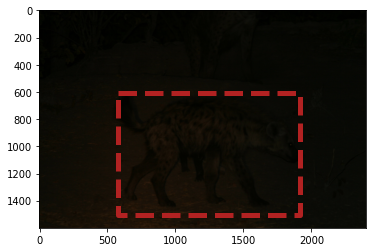

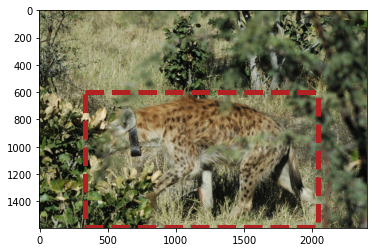

id                                          path  \
0        0  hyena.coco/images/train2022/000000000001.jpg   
1        1  hyena.coco/images/train2022/000000000002.jpg   
2        2  hyena.coco/images/train2022/000000000003.jpg   
3        3  hyena.coco/images/train2022/000000000004.jpg   
4        4  hyena.coco/images/train2022/000000000005.jpg   
...    ...                                           ...   
3124  3124  hyena.coco/images/train2022/000000003100.jpg   
3125  3125  hyena.coco/images/train2022/000000003101.jpg   
3126  3126  hyena.coco/images/train2022/000000003102.jpg   
3127  3127  hyena.coco/images/train2022/000000003103.jpg   
3128  3128  hyena.coco/images/train2022/000000003104.jpg   

                                  identity  \
0     ace33278-b65f-43d4-9c12-530e420ddef5   
1     5260c0df-76a3-4cb1-82fc-fd2f6a6440ad   
2     8aa6f9e4-e249-494f-a762-11e847296544   
3     143bf01f-d0f1-4ec9-bedd-ad0aa26e0cc2   
4     67006b29-4adc-41dc-9b30-39a94363a81a   
...                                    ...   
3124  08626c7e-f14d-4a22-8b38-f8474c0196de   
3125  8e52a7f7-8046-4567-b92a-e5941b184745   
3126  f1aa3589-f203-4455-a293-86f392932895   
3127  0d234988-cf58-4e62-b45b-4f23b54b1f2a   
3128  08626c7e-f14d-4a22-8b38-f8474c0196de   

                                                   bbox  
0     [580.1369863013698, 606.8493150684931, 1334.93...  
1     [331.1170212765957, 599.2021276595744, 1709.04...  
2     [180.8102345415778, 232.83582089552237, 2084.4...  
3     [1380.7453416149067, 733.2298136645962, 654.03...  
4     [426.027397260274, 829.4520547945204, 333.5616...  
...                                                 ...  
3124  [612.3287671232877, 503.42465753424653, 1026.0...  
3125  [0.0, 202.02020202020202, 2338.5858585858587, ...  
3126  [980.1369863013698, 276.027397260274, 1266.438...  
3127        [1448.4375, 717.1875, 651.5625, 397.265625]  
3128  [633.5616438356165, 234.24657534246575, 1228.0...  

[3129 rows x 4 columns]

In [23]:
df = analyze_dataset(HyenaID2022);

In [24]:
df[df[['identity', 'path']].duplicated(keep=False)]

id                                          path  \
208  208  hyena.coco/images/train2022/000000000207.jpg   
209  209  hyena.coco/images/train2022/000000000207.jpg   

                                 identity  \
208  74d538f0-cb3e-4982-9584-7e0f886b8397   
209  74d538f0-cb3e-4982-9584-7e0f886b8397   

                                                  bbox  
208  [774.6575342465753, 888.3561643835616, 545.890...  
209  [945.8904109589041, 652.054794520548, 891.0958...

# 18. IPanda50

- Keypoints provide annotations of right eye and left eye (each four coordinates).
- Missing elements are np.nan. It was np.inf before.
- Even though the splits are provided, we ignore them because there is some problem with Chinese characters for 49_yuanrun. The characters get changed into some gargabe and they have different values than those provided in the training/testing splits.

Number of identitites          50
Number of all samples          6874
Number of identified samples   6874
Number of unidentified samples 0


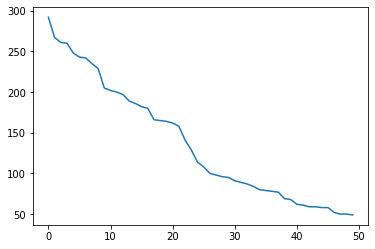

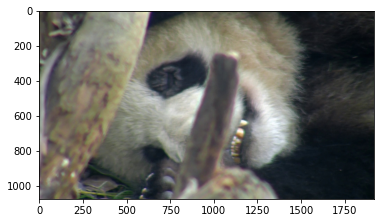

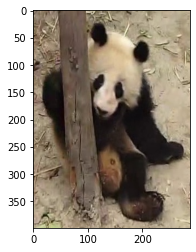

id                                               path  \
0     000012e43ecad67a      iPanda50-images/36_xingda/36_v040_f000110.jpg   
1     000322ab6c96fb1d      iPanda50-images/37_xinger/37_v038_f001370.jpg   
2     0006ec8d36dfe8ca      iPanda50-images/01_aoliao/01_v002_f000050.jpg   
3     0007464d66d9892e        iPanda50-images/33_wuyi/33_v078_f001895.jpg   
4     0010147ec2c8da72    iPanda50-images/47_yingying/47_v338_f000005.jpg   
...                ...                                                ...   
6869  ffc738666d198fe3    iPanda50-images/12_jingjing/12_v001_f000090.jpg   
6870  ffe2054e86631b8c  iPanda50-images/05_chengjiu/05_20160728-112100...   
6871  ffe2edc81232648d      iPanda50-images/36_xingda/36_v037_f000350.jpg   
6872  ffe3658c0bda028b    iPanda50-images/41_xingxiao/41_v028_f002380.jpg   
6873  ffe9941304e7f182      iPanda50-images/26_qiyuan/26_v018_f000595.jpg   

         identity                                          keypoints  
0       36_xingda  [nan, nan, nan, nan, 799.1578947368421, 377.10...  
1       37_xinger  [120.27906976744185, 132.55813953488374, 128.4...  
2       01_aoliao  [259.66666666666663, 95.77777777777777, 253.0,...  
3         33_wuyi  [nan, nan, nan, nan, 255.5625, 408.9375, 269.6...  
4     47_yingying  [424.57894736842104, 182.21052631578945, 414.0...  
...           ...                                                ...  
6869  12_jingjing           [nan, nan, nan, nan, nan, nan, nan, nan]  
6870  05_chengjiu  [196.1635220125786, 265.0377358490566, 186.729...  
6871    36_xingda  [606.0625, 267.0, 599.8125, 202.9375, nan, nan...  
6872  41_xingxiao  [249.0, 276.0, 254.14285714285717, 258.8571428...  
6873    26_qiyuan  [301.82978723404256, 182.04255319148936, 311.4...  

[6874 rows x 4 columns]

In [25]:
analyze_dataset(IPanda50);

# 19. LeopardID2022

- There is 1 mistake in labels, where there are two animals at on photo.
- There is identity ____ which makes the difference between 431 individuals (ours) and 430 individuals (website). We replaed it by 'unknown'.

Number of identitites          430
Number of all samples          6825
Number of identified samples   6806
Number of unidentified samples 19


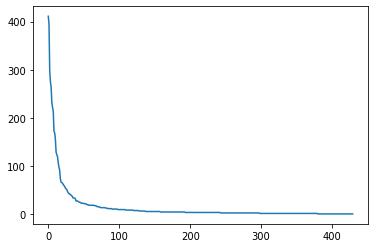

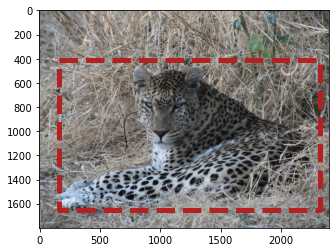

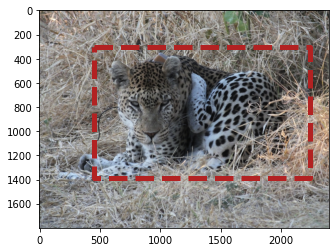

id                                            path  \
0        0  leopard.coco/images/train2022/000000000001.jpg   
1        1  leopard.coco/images/train2022/000000000002.jpg   
2        2  leopard.coco/images/train2022/000000000003.jpg   
3        3  leopard.coco/images/train2022/000000000004.jpg   
4        4  leopard.coco/images/train2022/000000000005.jpg   
...    ...                                             ...   
6820  6820  leopard.coco/images/train2022/000000006791.jpg   
6821  6821  leopard.coco/images/train2022/000000006792.jpg   
6822  6822  leopard.coco/images/train2022/000000006793.jpg   
6823  6823  leopard.coco/images/train2022/000000006794.jpg   
6824  6824  leopard.coco/images/train2022/000000006795.jpg   

                                  identity  \
0     9ec659d2-2183-4f55-8882-1fe87e13d5f4   
1     9ec659d2-2183-4f55-8882-1fe87e13d5f4   
2     9ec659d2-2183-4f55-8882-1fe87e13d5f4   
3     9ec659d2-2183-4f55-8882-1fe87e13d5f4   
4     9ec659d2-2183-4f55-8882-1fe87e13d5f4   
...                                    ...   
6820  4f583226-f799-4639-8041-adc3731bb4b5   
6821  559a4a0f-4fa5-46f6-af56-f7aa36bf35dd   
6822  ba8ce8ba-6311-4250-95dd-5e5efa32ebd0   
6823  559a4a0f-4fa5-46f6-af56-f7aa36bf35dd   
6824  ba8ce8ba-6311-4250-95dd-5e5efa32ebd0   

                                                   bbox  
0     [163.02083333333334, 411.9791666666667, 2161.4...  
1     [448.43750000000006, 301.0416666666667, 1794.2...  
2     [476.0416666666667, 628.6458333333334, 1743.75...  
3     [206.77083333333334, 255.20833333333334, 2193....  
4     [296.3541666666667, 633.8541666666667, 1947.91...  
...                                                 ...  
6820  [920.8333333333334, 586.4583333333334, 1053.64...  
6821  [1118.9814814814815, 686.5740740740741, 296.29...  
6822  [1062.037037037037, 646.2962962962963, 191.666...  
6823  [483.3333333333333, 411.1111111111111, 962.037...  
6824                     [0.0, 356.25, 2400.0, 1443.75]  

[6825 rows x 4 columns]

In [26]:
df = analyze_dataset(LeopardID2022);

In [27]:
df[df[['identity', 'path']].duplicated(keep=False)]

id                                            path  \
4602  4602  leopard.coco/images/train2022/000000004590.jpg   
4603  4603  leopard.coco/images/train2022/000000004590.jpg   

                                  identity                              bbox  
4602  2112bdfc-4c7c-4c2a-8cfa-28ea45bf1599  [592.5, 141.25, 1266.25, 771.25]  
4603  2112bdfc-4c7c-4c2a-8cfa-28ea45bf1599     [682.5, 37.5, 1082.5, 836.25]

# 20. LionData

- The dataset is very strange - usually, the immage consists of some body parts that are cropped from the images.
- Even though training and valid sets are provided, the intersection of individuals between them is empty. Therefore, we ignore it.

Number of identitites          94
Number of all samples          740
Number of identified samples   740
Number of unidentified samples 0


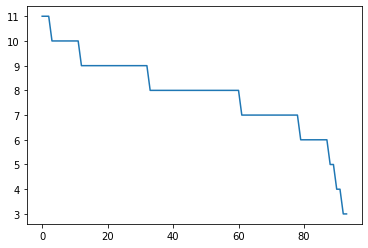

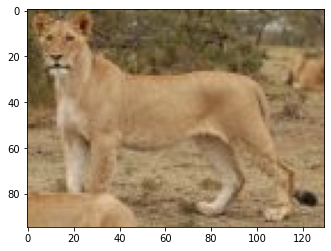

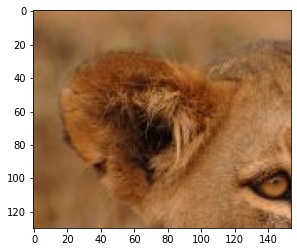

id                                               path  \
0    0050b870a1f4d586  wildlife_reidentification-main/Lion_Data_Zero/...   
1    009b7fa63cfb88f5  wildlife_reidentification-main/Lion_Data_Zero/...   
2    01038e09440889ed  wildlife_reidentification-main/Lion_Data_Zero/...   
3    015e3dd761fdc45e  wildlife_reidentification-main/Lion_Data_Zero/...   
4    01719ac6abb0c2b0  wildlife_reidentification-main/Lion_Data_Zero/...   
..                ...                                                ...   
735  feef31d69a28c112  wildlife_reidentification-main/Lion_Data_Zero/...   
736  ff64e4387184a1bf  wildlife_reidentification-main/Lion_Data_Zero/...   
737  ff8960fab342aa02  wildlife_reidentification-main/Lion_Data_Zero/...   
738  ff9189eb3518f277  wildlife_reidentification-main/Lion_Data_Zero/...   
739  ffdcea23597be814  wildlife_reidentification-main/Lion_Data_Zero/...   

      identity  
0       Maskio  
1        Arria  
2      Blackie  
3        Naini  
4       Moswen  
..         ...  
735  White-Eye  
736  Olbarnoti  
737     Napono  
738      Charm  
739     Enkume  

[740 rows x 3 columns]

In [28]:
analyze_dataset(LionData);

# 21. MacaqueFaces

- Everything seems to be OK

Number of identitites          34
Number of all samples          6280
Number of identified samples   6280
Number of unidentified samples 0


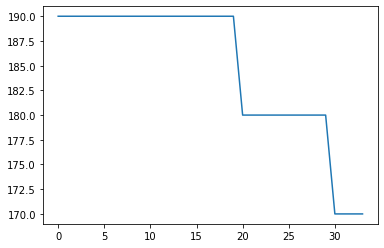

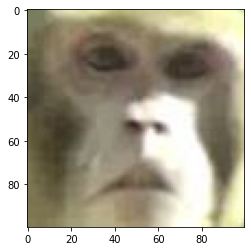

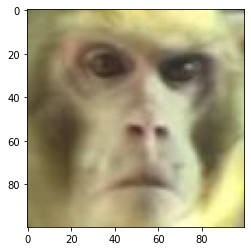

id                                              path identity  \
0        0      MacaqueFaces/Contrast/Dan/Macaque_Face_1.jpg      Dan   
1        1      MacaqueFaces/Contrast/Dan/Macaque_Face_2.jpg      Dan   
2        2      MacaqueFaces/Contrast/Dan/Macaque_Face_3.jpg      Dan   
3        3      MacaqueFaces/Contrast/Dan/Macaque_Face_4.jpg      Dan   
4        4      MacaqueFaces/Contrast/Dan/Macaque_Face_5.jpg      Dan   
...    ...                                               ...      ...   
6275  6275  MacaqueFaces/Random/Verity/Macaque_Face_6276.jpg   Verity   
6276  6276  MacaqueFaces/Random/Verity/Macaque_Face_6277.jpg   Verity   
6277  6277  MacaqueFaces/Random/Verity/Macaque_Face_6278.jpg   Verity   
6278  6278  MacaqueFaces/Random/Verity/Macaque_Face_6279.jpg   Verity   
6279  6279  MacaqueFaces/Random/Verity/Macaque_Face_6280.jpg   Verity   

                    attributes  
0     {'Category': 'Contrast'}  
1     {'Category': 'Contrast'}  
2     {'Category': 'Contrast'}  
3     {'Category': 'Contrast'}  
4     {'Category': 'Contrast'}  
...                        ...  
6275    {'Category': 'Random'}  
6276    {'Category': 'Random'}  
6277    {'Category': 'Random'}  
6278    {'Category': 'Random'}  
6279    {'Category': 'Random'}  

[6280 rows x 4 columns]

In [29]:
analyze_dataset(MacaqueFaces);

# 22. NDD20
- In total, around 14% of masks contain an ID attribute with 44 unique classes present.
- 44 are only above water. below water are 82, total are 82. check if the numbering of above and below water is the same.
- Possibly save true/false as bool.
- Multiple individuals at photos -> solved by segmentation.

Number of identitites          82
Number of all samples          6102
Number of identified samples   2657
Number of unidentified samples 3445


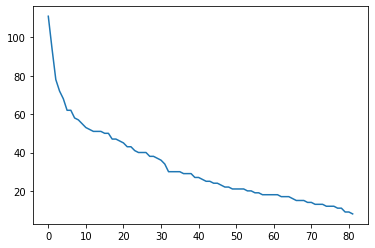

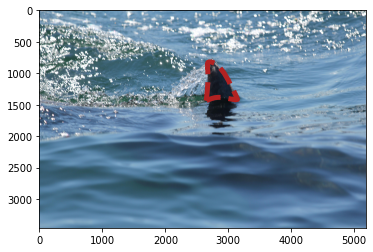

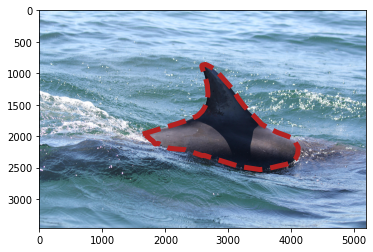

id            path identity  \
0        0   ABOVE/104.jpg  unknown   
1        1  ABOVE/1841.jpg  unknown   
2        2  ABOVE/2118.jpg  unknown   
3        3  ABOVE/1042.jpg  unknown   
4        4  ABOVE/1042.jpg  unknown   
...    ...             ...      ...   
6097  6097  BELOW/1789.jpg       25   
6098  6098   BELOW/810.jpg       70   
6099  6099  BELOW/1555.jpg       70   
6100  6100  BELOW/1266.jpg       70   
6101  6101  BELOW/1999.jpg       70   

                                           segmentation position species  \
0     [2648.0, 1434.0, 2659.0, 1360.0, 2673.0, 1200....    above     BND   
1     [1641.0, 1966.0, 1834.0, 1908.0, 2181.0, 1803....    above     BND   
2     [1869.0, 2128.0, 2095.0, 2131.0, 2139.0, 2123....    above     BND   
3     [1979.0, 1743.0, 1847.0, 1699.0, 1773.0, 1638....    above     BND   
4     [1966.0, 1707.0, 1891.0, 1627.0, 1850.0, 1566....    above     BND   
...                                                 ...      ...     ...   
6097  [453.0, 628.0, 520.0, 585.0, 552.0, 571.0, 569...    below     NaN   
6098  [338.0, 407.0, 369.0, 428.0, 398.0, 419.0, 430...    below     NaN   
6099  [545.0, 371.0, 601.0, 400.0, 626.0, 401.0, 644...    below     NaN   
6100  [775.0, 533.0, 778.0, 523.0, 783.0, 514.0, 801...    below     NaN   
6101  [790.0, 558.0, 802.0, 520.0, 829.0, 507.0, 856...    below     NaN   

                     attributes  
0         {'out of focus': nan}  
1         {'out of focus': nan}  
2         {'out of focus': nan}  
3         {'out of focus': nan}  
4         {'out of focus': nan}  
...                         ...  
6097  {'out of focus': 'false'}  
6098  {'out of focus': 'false'}  
6099  {'out of focus': 'false'}  
6100  {'out of focus': 'false'}  
6101  {'out of focus': 'false'}  

[6102 rows x 7 columns]

In [30]:
analyze_dataset(NDD20);

# 23. NOAA Right Whale

- TODO Redownload dataset. w_7849 was one folder higher than it should be. Maybe I moved it there by mistake.

Number of identitites          447
Number of all samples          11469
Number of identified samples   4544
Number of unidentified samples 6925


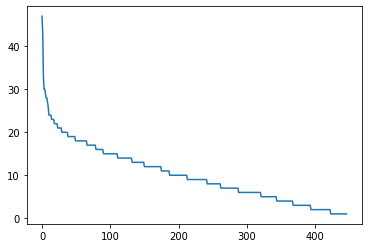

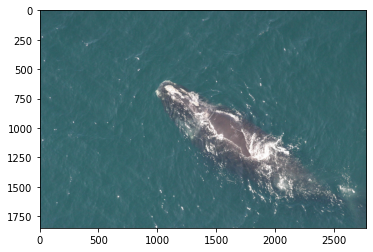

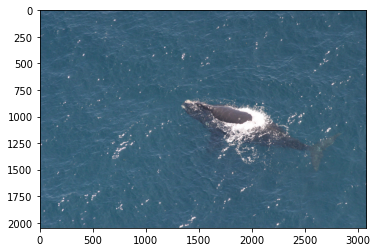

id              path     identity
0          0      imgs/w_0.jpg      unknown
1          1      imgs/w_1.jpg  whale_72820
2          2      imgs/w_2.jpg      unknown
3          3      imgs/w_3.jpg  whale_34656
4          4      imgs/w_4.jpg      unknown
...      ...               ...          ...
11464  11464  imgs/w_11464.jpg      unknown
11465  11465  imgs/w_11465.jpg      unknown
11466  11466  imgs/w_11466.jpg      unknown
11467  11467  imgs/w_11467.jpg      unknown
11468  11468  imgs/w_11468.jpg      unknown

[11469 rows x 3 columns]

In [31]:
analyze_dataset(NOAARightWhale);

# 24. NyalaData

- Even though training and valid sets are provided, the intersection of individuals between them is empty.

Number of identitites          237
Number of all samples          1942
Number of identified samples   1942
Number of unidentified samples 0


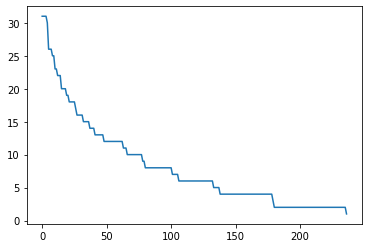

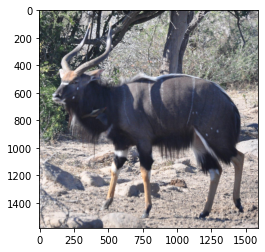

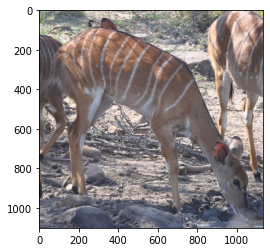

id                                               path  \
0     0059ff52cecc36e9  wildlife_reidentification-main/Nyala_Data_Zero...   
1     005d8127c517bb4f  wildlife_reidentification-main/Nyala_Data_Zero...   
2     008704ae8100e69a  wildlife_reidentification-main/Nyala_Data_Zero...   
3     0093921f040a08f1  wildlife_reidentification-main/Nyala_Data_Zero...   
4     00b507f86cb33078  wildlife_reidentification-main/Nyala_Data_Zero...   
...                ...                                                ...   
1937  ff23ad7bf130a5e8  wildlife_reidentification-main/Nyala_Data_Zero...   
1938  ff3ea932c8a937ac  wildlife_reidentification-main/Nyala_Data_Zero...   
1939  ff5b29e291c08b04  wildlife_reidentification-main/Nyala_Data_Zero...   
1940  ffcd28a7d1110b93  wildlife_reidentification-main/Nyala_Data_Zero...   
1941  fffa9044d6e026ab  wildlife_reidentification-main/Nyala_Data_Zero...   

      identity  
0           19  
1           10  
2           57  
3          149  
4           58  
...        ...  
1937        27  
1938        21  
1939        57  
1940         8  
1941       177  

[1942 rows x 3 columns]

In [32]:
analyze_dataset(NyalaData);

# 25. OpenCows2020

- Folder structure includes Train/Test splits (across categories)
- Additionally, they provide some kind of category splits (can it be for open set classification? )
- Subfolder sctucture in test and train matches category (identities): test/001 is the same cow as train/001

Number of identitites          46
Number of all samples          4736
Number of identified samples   4736
Number of unidentified samples 0


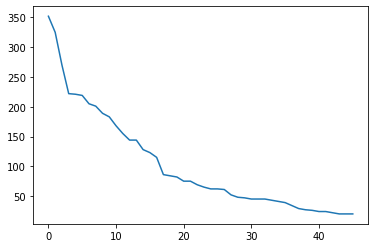

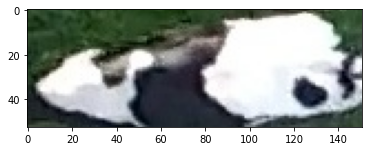

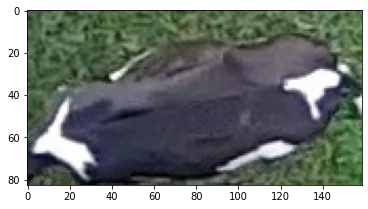

id                                               path  \
0     00192639fd6df155  10m32xl88x2b61zlkkgz3fml17/identification/imag...   
1     001d0519bc54343e  10m32xl88x2b61zlkkgz3fml17/identification/imag...   
2     002c48f3caf7516e  10m32xl88x2b61zlkkgz3fml17/identification/imag...   
3     00517a4f8038ee4b  10m32xl88x2b61zlkkgz3fml17/identification/imag...   
4     00538b3d4b88aed0  10m32xl88x2b61zlkkgz3fml17/identification/imag...   
...                ...                                                ...   
4731  ffe12713a0364f02  10m32xl88x2b61zlkkgz3fml17/identification/imag...   
4732  fff2b100edabf605  10m32xl88x2b61zlkkgz3fml17/identification/imag...   
4733  fff5d5e9763a1a93  10m32xl88x2b61zlkkgz3fml17/identification/imag...   
4734  fff7204a24d58cdc  10m32xl88x2b61zlkkgz3fml17/identification/imag...   
4735  fff9451c33c74760  10m32xl88x2b61zlkkgz3fml17/identification/imag...   

     identity  split  
0         016  train  
1         013  train  
2         004  train  
3         012   test  
4         010  train  
...       ...    ...  
4731      006   test  
4732      004  train  
4733      030  train  
4734      008  train  
4735      026  train  

[4736 rows x 4 columns]

In [33]:
analyze_dataset(OpenCows2020);

# 26. SealID
- Dataset comes in two flavours.
    - Original image - image with single seal, including background (very similar to our turtles)
    - Segmented image - same as 'Original image', but background is segmented and black.
    - Ids and filenames are the same - different is only parent folder
    
- Maybe we can crop the segmented images (in that way, it would be the same as we do with turtles)
- I do not understand the difference between both splits. All splits contain all identities. Probably we should ignore one of the splits. The proportion of training data is quite small in both splits (20% and 40%).
- There is also the patches folder. Do we want to do anything about it? I would ignore it.

Number of identitites          57
Number of all samples          2080
Number of identified samples   2080
Number of unidentified samples 0


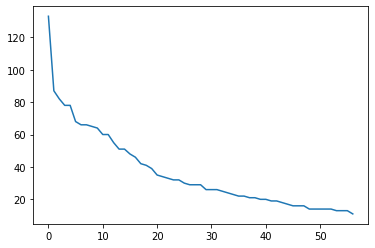

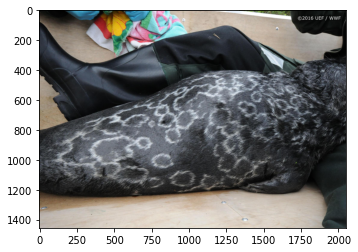

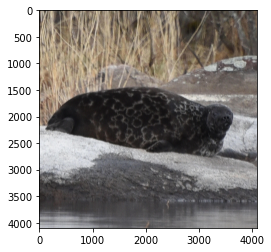

id                                 path  identity reid_split  \
0     aadqxb  full images/source_query/aadqxb.jpg       104      query   
1     aayvnn  full images/source_query/aayvnn.jpg         3      query   
2     abecjl  full images/source_query/abecjl.jpg       125      query   
3     abejsg  full images/source_query/abejsg.jpg       114      query   
4     abnqwb  full images/source_query/abnqwb.jpg       167      query   
...      ...                                  ...       ...        ...   
2075  zyubgj  full images/source_query/zyubgj.jpg       104      query   
2076  zzajic  full images/source_query/zzajic.jpg       125      query   
2077  zzilzg  full images/source_query/zzilzg.jpg        88      query   
2078  zzlehk  full images/source_query/zzlehk.jpg       168      query   
2079  zzveeq  full images/source_query/zzveeq.jpg        81      query   

     segmentation_split  
0               testing  
1              training  
2               testing  
3               testing  
4               testing  
...                 ...  
2075         validation  
2076            testing  
2077           training  
2078            testing  
2079           training  

[2080 rows x 5 columns]

In [34]:
analyze_dataset(SealID, variant='source');

Number of identitites          57
Number of all samples          2080
Number of identified samples   2080
Number of unidentified samples 0


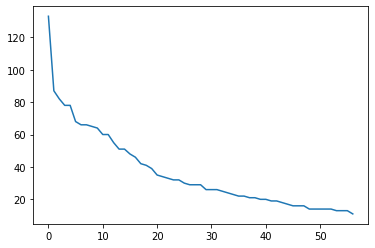

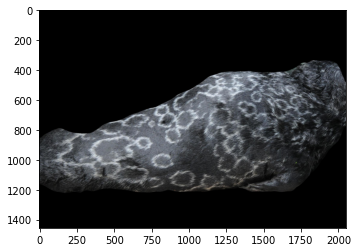

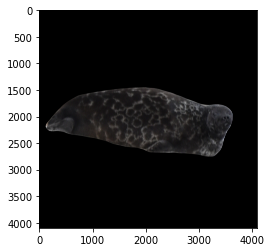

id                                    path  identity reid_split  \
0     aadqxb  full images/segmented_query/aadqxb.jpg       104      query   
1     aayvnn  full images/segmented_query/aayvnn.jpg         3      query   
2     abecjl  full images/segmented_query/abecjl.jpg       125      query   
3     abejsg  full images/segmented_query/abejsg.jpg       114      query   
4     abnqwb  full images/segmented_query/abnqwb.jpg       167      query   
...      ...                                     ...       ...        ...   
2075  zyubgj  full images/segmented_query/zyubgj.jpg       104      query   
2076  zzajic  full images/segmented_query/zzajic.jpg       125      query   
2077  zzilzg  full images/segmented_query/zzilzg.jpg        88      query   
2078  zzlehk  full images/segmented_query/zzlehk.jpg       168      query   
2079  zzveeq  full images/segmented_query/zzveeq.jpg        81      query   

     segmentation_split  
0               testing  
1              training  
2               testing  
3               testing  
4               testing  
...                 ...  
2075         validation  
2076            testing  
2077           training  
2078            testing  
2079           training  

[2080 rows x 5 columns]

In [35]:
analyze_dataset(SealID, variant='segmented');

# 27. SMALST

- OK

Number of identitites          10
Number of all samples          12850
Number of identified samples   12850
Number of unidentified samples 0


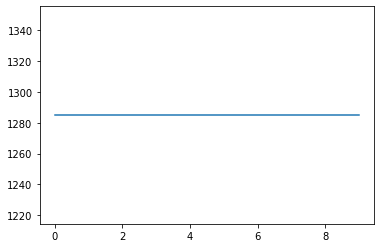

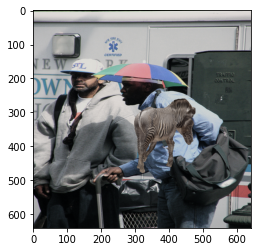

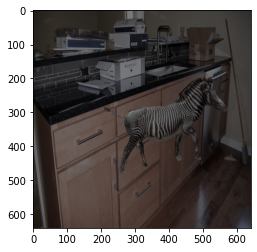

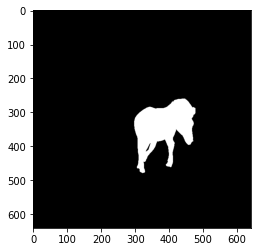

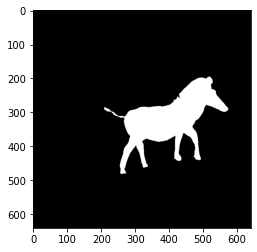

id                                               path identity  \
0          0      zebra_training_set/images/zebra_A_frame_0.png        A   
1          1      zebra_training_set/images/zebra_A_frame_1.png        A   
2          2      zebra_training_set/images/zebra_A_frame_2.png        A   
3          3      zebra_training_set/images/zebra_A_frame_3.png        A   
4          4      zebra_training_set/images/zebra_A_frame_4.png        A   
...      ...                                                ...      ...   
12845  12845  zebra_training_set/images/zebra_N_frame_12845.png        N   
12846  12846  zebra_training_set/images/zebra_N_frame_12846.png        N   
12847  12847  zebra_training_set/images/zebra_N_frame_12847.png        N   
12848  12848  zebra_training_set/images/zebra_N_frame_12848.png        N   
12849  12849  zebra_training_set/images/zebra_N_frame_12849.png        N   

                                                   mask  
0          zebra_training_set/bgsub/zebra_A_frame_0.png  
1          zebra_training_set/bgsub/zebra_A_frame_1.png  
2          zebra_training_set/bgsub/zebra_A_frame_2.png  
3          zebra_training_set/bgsub/zebra_A_frame_3.png  
4          zebra_training_set/bgsub/zebra_A_frame_4.png  
...                                                 ...  
12845  zebra_training_set/bgsub/zebra_N_frame_12845.png  
12846  zebra_training_set/bgsub/zebra_N_frame_12846.png  
12847  zebra_training_set/bgsub/zebra_N_frame_12847.png  
12848  zebra_training_set/bgsub/zebra_N_frame_12848.png  
12849  zebra_training_set/bgsub/zebra_N_frame_12849.png  

[12850 rows x 4 columns]

In [36]:
analyze_dataset(SMALST);

# 28. StripeSpotter

- We ignore thumbnails and cropped images (bboxes are provided).
- 4 images have N/A identity replace by unknown.
- There is metadata file at os.path.join(root, 'data', 'metadata.dat') No idea how to open it. Ignoring it.

Number of identitites          45
Number of all samples          824
Number of identified samples   820
Number of unidentified samples 4


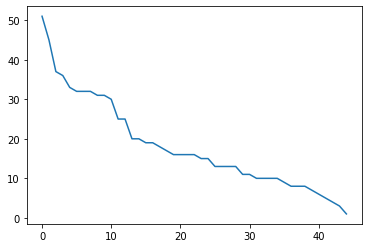

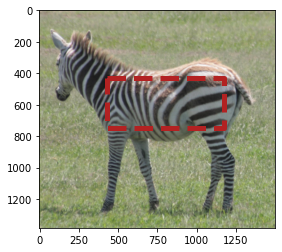

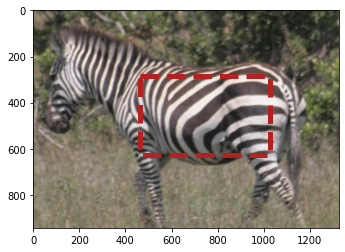

id                         path identity  \
0    005c8fdfdd7b5029  data/images/img-0000586.jpg   09_212   
1    00770b7816973760  data/images/img-0000230.jpg  S09_161   
2    0081df80e662f31a  data/images/img-0000487.jpg   08_085   
3    00ad39579920ae3e  data/images/img-0000452.jpg   08_100   
4    00f70eabfc4c9d23  data/images/img-0000801.jpg   09_200   
..                ...                          ...      ...   
819  fd1a864f6881842e  data/images/img-0000548.jpg   04_008   
820  fd74c6d14b5a39ef  data/images/img-0000013.jpg  S09_086   
821  fe3315432d297bb1  data/images/img-0000220.jpg  S09_161   
822  fe6fe76606f00b03  data/images/img-0000669.jpg   01_230   
823  fff5528351fa6656  data/images/img-0000538.jpg   04_008   

                     bbox                                   attributes  
0    [428, 431, 744, 317]   {'flank': 'left', 'photo_quality': 'best'}  
1    [462, 283, 563, 342]     {'flank': 'left', 'photo_quality': 'ok'}  
2    [507, 164, 615, 250]   {'flank': 'left', 'photo_quality': 'best'}  
3    [709, 328, 816, 398]    {'flank': 'left', 'photo_quality': 'bad'}  
4    [575, 590, 971, 461]     {'flank': 'left', 'photo_quality': 'ok'}  
..                    ...                                          ...  
819   [484, 96, 511, 176]   {'flank': 'left', 'photo_quality': 'best'}  
820  [291, 176, 698, 255]  {'flank': 'right', 'photo_quality': 'good'}  
821  [574, 332, 660, 339]     {'flank': 'left', 'photo_quality': 'ok'}  
822  [341, 132, 697, 442]    {'flank': 'right', 'photo_quality': 'ok'}  
823  [193, 208, 937, 369]  {'flank': 'right', 'photo_quality': 'best'}  

[824 rows x 5 columns]

In [37]:
analyze_dataset(StripeSpotter);

# 29. WhaleSharkID
- The only WildMe dataset with no apparently wrong labels.

Number of identitites          543
Number of all samples          7693
Number of identified samples   7693
Number of unidentified samples 0


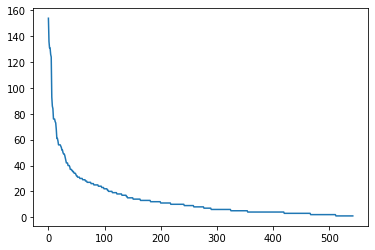

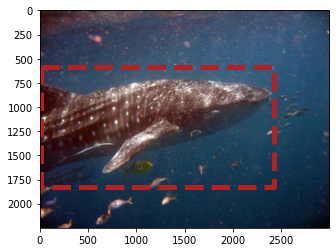

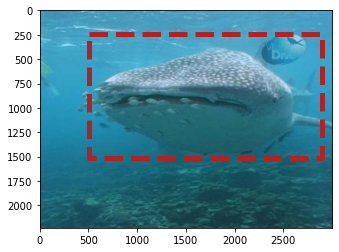

id                                               path  \
0        0  whaleshark.coco/images/train2020/000000000001.jpg   
1        1  whaleshark.coco/images/train2020/000000000002.jpg   
2        2  whaleshark.coco/images/train2020/000000000003.jpg   
3        3  whaleshark.coco/images/train2020/000000000004.jpg   
4        4  whaleshark.coco/images/train2020/000000000005.jpg   
...    ...                                                ...   
7688  7688  whaleshark.coco/images/train2020/000000007689.jpg   
7689  7689  whaleshark.coco/images/train2020/000000007690.jpg   
7690  7690  whaleshark.coco/images/train2020/000000007691.jpg   
7691  7691  whaleshark.coco/images/train2020/000000007692.jpg   
7692  7692  whaleshark.coco/images/train2020/000000007693.jpg   

                                  identity  \
0     10563a2a-4c62-e8c9-e5a5-8582bf2eb059   
1     341569f2-1f34-4884-1dd3-79137be4c77f   
2     69f95579-8a42-8d93-8d78-7b641952933c   
3     26560de1-6930-ddaf-5069-f7b85acd40fb   
4     a785af89-b8c0-5e7b-acec-c4874ec5483f   
...                                    ...   
7688  431741cc-839f-cbaf-9859-162abfa36ba4   
7689  13358d13-b940-7836-2d35-d00e8310b297   
7690  ecec2054-01c7-ed9d-94c6-603a3836f2f2   
7691  461d166d-0321-fe1b-8796-dbcb72672a64   
7692  26560de1-6930-ddaf-5069-f7b85acd40fb   

                                                   bbox  
0                         [18.0, 582.0, 2412.0, 1248.0]  
1     [510.89918256130795, 237.0572207084469, 2386.9...  
2     [316.6118421052631, 627.4671052631578, 2196.54...  
3     [78.14269535673839, 6.795016987542469, 2898.07...  
4     [198.01980198019803, 414.4271570014144, 2787.8...  
...                                                 ...  
7688  [0.0, 254.16666666666669, 2995.8333333333335, ...  
7689  [623.8479262672811, 478.68663594470047, 2120.3...  
7690  [0.0, 191.66666666666669, 2916.666666666667, 2...  
7691   [52.734375, 287.109375, 2941.40625, 2091.796875]  
7692          [1134.375, 464.0625, 1846.875, 1495.3125]  

[7693 rows x 4 columns]

In [38]:
df = analyze_dataset(WhaleSharkID);

In [39]:
df[df[['identity', 'path']].duplicated(keep=False)]

Empty DataFrame
Columns: [id, path, identity, bbox]
Index: []

# 30. WNIGiraffes

- TODO: what to do with keypoints? FOr each image, there are up to 4*(8+2)=40 numbers.

Number of identitites          1000
Number of all samples          29806
Number of identified samples   29806
Number of unidentified samples 0


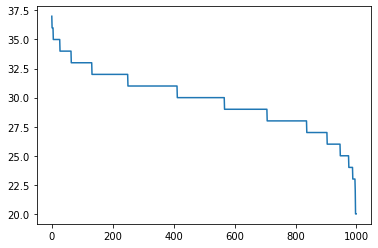

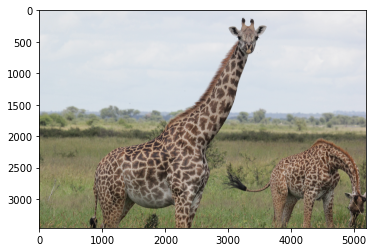

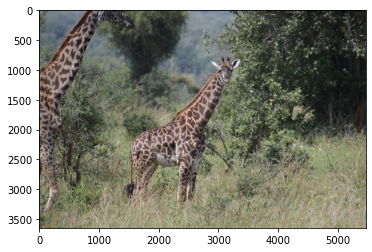

id                                               path  \
0      00007698f444e94c  train/284/4263c532-5b33-11eb-8d5d-000d3a74c7de...   
1      0002be2048c96296  train/346/4225bf02-5b33-11eb-99f7-000d3a74c7de...   
2      0002f2ce323ade7e  train/285/43489cdf-5b33-11eb-a8aa-000d3a74c7de...   
3      0003548d9ecffd7c  train/178/41ba7318-5b33-11eb-a7d1-000d3a74c7de...   
4      00044f03c065aba8  train/194/42a1ba4c-5b33-11eb-a855-000d3a74c7de...   
...                 ...                                                ...   
29801  fff340c5d5989aec  train/178/435bb346-5b33-11eb-b531-000d3a74c7de...   
29802  fff39a67159fa24b  train/293/421048f3-5b33-11eb-ba54-000d3a74c7de...   
29803  fff707b93bf04af3  train/599/42fc54b6-5b33-11eb-be20-000d3a74c7de...   
29804  fffaa333c0ced2d5  train/819/406f0b07-5b33-11eb-a105-000d3a74c7de...   
29805  ffffc33906b33224  train/700/415fdb14-5b33-11eb-b2f8-000d3a74c7de...   

       identity                                      file  
0           284  4263c532-5b33-11eb-8d5d-000d3a74c7de.jpg  
1           346  4225bf02-5b33-11eb-99f7-000d3a74c7de.jpg  
2           285  43489cdf-5b33-11eb-a8aa-000d3a74c7de.jpg  
3           178  41ba7318-5b33-11eb-a7d1-000d3a74c7de.jpg  
4           194  42a1ba4c-5b33-11eb-a855-000d3a74c7de.jpg  
...         ...                                       ...  
29801       178  435bb346-5b33-11eb-b531-000d3a74c7de.jpg  
29802       293  421048f3-5b33-11eb-ba54-000d3a74c7de.jpg  
29803       599  42fc54b6-5b33-11eb-be20-000d3a74c7de.jpg  
29804       819  406f0b07-5b33-11eb-a105-000d3a74c7de.jpg  
29805       700  415fdb14-5b33-11eb-b2f8-000d3a74c7de.jpg  

[29806 rows x 4 columns]

In [40]:
analyze_dataset(WNIGiraffes);

# 31. ZindiTurtleRecall

- Test dataset does not have labels.

Number of identitites          2265
Number of all samples          13293
Number of identified samples   12803
Number of unidentified samples 490


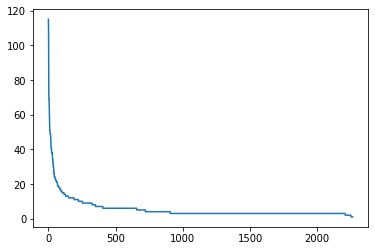

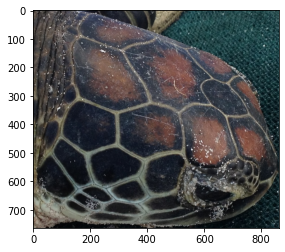

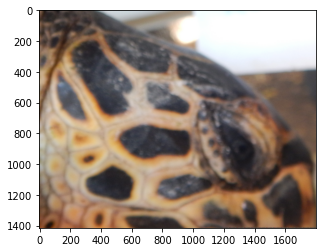

id                    path       identity position       split
0      ID_0014D1K8  images/ID_0014D1K8.JPG  t_id_fqDgMhDd      NaN  unassigned
1      ID_001DWTZB  images/ID_001DWTZB.JPG  t_id_5XR47555      NaN  unassigned
2      ID_009TNNQ8  images/ID_009TNNQ8.JPG  t_id_Kf73l69A     left       train
3      ID_00CWHTC5  images/ID_00CWHTC5.JPG  t_id_jmfZG8Mw      NaN  unassigned
4      ID_00JE9D7C  images/ID_00JE9D7C.JPG  t_id_3JFrWhUV      NaN  unassigned
...            ...                     ...            ...      ...         ...
13288  ID_ZZ04P34G  images/ID_ZZ04P34G.JPG  t_id_o8HFaaCp      NaN  unassigned
13289  ID_ZZD2VBPA  images/ID_ZZD2VBPA.JPG  t_id_ruF8Nbxs      NaN  unassigned
13290  ID_ZZEGHRM5  images/ID_ZZEGHRM5.JPG  t_id_m2JvEcsg     left       train
13291  ID_ZZJTYG67  images/ID_ZZJTYG67.JPG        unknown    right        test
13292  ID_ZZQZJBRE  images/ID_ZZQZJBRE.JPG  t_id_mr3e5P1U      NaN  unassigned

[13293 rows x 5 columns]

In [41]:
analyze_dataset(ZindiTurtleRecall);